# **Desempeño numpy.linalg.solve**

Se procede a medir el desempeño de la función numpy.linalg.solve en función del tamaño de la matriz.

Se importan las librerías a usar y el módulo *timeit*,

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

Ahora, se crea el arreglo que contiene los tamaños de las matrices y los arreglos en los cuales se guardaran los resultados.

In [2]:
N = np.array([10, 100, 200, 500, 1000, 1200, 1500, 2000, 2500, 3000, 4000, 5000])
promedios_tiempos = np.zeros(len(N))
desviacion_tiempos = np.zeros(len(N))

Se crea un arreglo en el que se guardarán temporalmente los valores de cada repitición por tamaño de la matriz, y un contador.

In [3]:
tiempo = np.zeros(100)
count = 0

Luego, se define el loop en el cual por tamaño se crearán matrices aleatorias $A = n \times n$ y vectores aleatorios de solución $b = n$, y se mide el tiempo que tarda *numpy.linalg.solve* en resolver el sistema.
Por cada tamaño se repite el proceso 5 veces. Al ser finalizadas las repeticiones se calculan los promedios y las desviaciones estándar de los tiempos medidos.

In [ ]:
np.random.seed(33)

for n in N:
    for ii in range(0,100):
        A = np.random.rand(n,n)
        b = np.random.rand(n)
        t0 = timeit.default_timer()
        x = np.linalg.solve(A,b)
        t1 = timeit.default_timer()
        tiempo[ii] =  t1 - t0
    promedios_tiempos[count] = np.average(tiempo)
    desviacion_tiempos[count] = np.std(tiempo)
    count += 1

Se grafican los promedios de tiempo normalizados (se dividen por el tiempo que tomó para una matriz de tamaño $10 \times 10$) en función del tamaño de la matriz. Se incluyen las barras de error—que son tres veces la desviación estándar normalizada—.

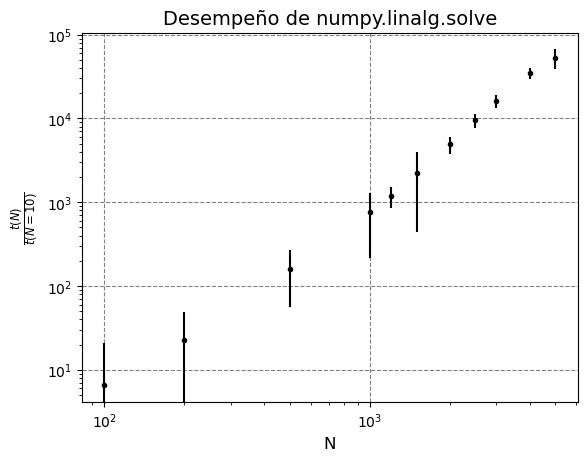

In [ ]:
#Graficar al tiempo
plt.loglog(N[1:], promedios_tiempos[1:]/promedios_tiempos[0], ".", color = "k")
plt.errorbar(N[1:], promedios_tiempos[1:]/promedios_tiempos[0], yerr = 3*(desviacion_tiempos[1:]/desviacion_tiempos[0]), ls = '', color = "k")

#Nombrar ejes y añadir título
plt.xlabel(r"N", fontsize = 12)
plt.ylabel(r"$\frac{t(N)}{t(N=10)}$", fontsize = 12)
plt.title(r"Desempeño de numpy.linalg.solve", fontsize = 14)

#Añadir cuadrícula
plt.grid(color = "gray", linestyle = "--")

#Guardar figura como pdf
plt.savefig("Desempeño_numpylinalgsolve.pdf", dpi = 400)

#Presentar la gráfica en pantalla
plt.show()